In [1]:
#!/usr/bin/env python
import numpy as np
import math

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

## Train Gaussian Process Regressor Model

In [2]:
def model(ratio):
    # Load training and testing data
    X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1) # each row is an observation with 6 features
    y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1] # each row corresponds to actual value of observation from ^

    # Set up the model
    kernel = DotProduct() + WhiteKernel()
    regression = GaussianProcessRegressor(kernel=kernel, random_state=0)

    # Partition data into train and test
    train_x, cross_validation_x_data, train_y, cross_validation_actual_y_values = train_test_split(X_train, y_train, test_size=(1-ratio), random_state=0)

    # Train model
    regression.fit(train_x, train_y)

    # Test model
    test_y = regression.predict(cross_validation_x_data)
        
    mse = mean_squared_error(cross_validation_actual_y_values, test_y)
    rmse = math.sqrt(mse)
    coeff_det = regression.score(cross_validation_x_data, cross_validation_actual_y_values)
    return (rmse, coeff_det, regression, cross_validation_x_data, cross_validation_actual_y_values, test_y)

ratio = 0.83
rmse, coeff, regression, cross_validation_x_data, cross_validation_actual_y_values, test_y = model(ratio)

print("Root mean square error = " + str(rmse))
print("Coefficient of determination R^2 = " + str(coeff))

X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_pred = regression.predict(X_test)

Root mean square error = 48.99477685930217
Coefficient of determination R^2 = 0.8809857695299543


## Predict and save to my_submission.csv

In [3]:
test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")

## Evaluate trained model

In [4]:
lst = ["Machine cycle time (Nanoseconds)", "Min memory", "Max memory", "Cache Memory Size", "Cache Average"]
def plot(X, y_actual, y_predicted, feature_index):
    feature = lst[feature_index]
    plt.scatter(X[:,feature_index], y_actual, color="darkorange")
    sns.regplot(X[:,feature_index], y_predicted)
    plt.title("Gaussian Process Regressor")
    plt.xlabel(feature)
    plt.ylabel("CPU Performance")
    plt.legend(["Predicted", "Actual"])
    plt.savefig("gaussian_process_regressor/" + feature + ".png")
    
print("--------   Trained Model with Ratio = " + str(ratio) + "   --------")
print("Root mean square error = " + str(rmse))
print("Coefficient of determination R^2 = " + str(coeff))

--------   Trained Model with Ratio = 0.83   --------
Root mean square error = 48.99477685930217
Coefficient of determination R^2 = 0.8809857695299543


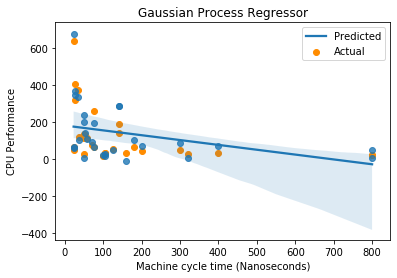

In [5]:
plot(cross_validation_x_data, cross_validation_actual_y_values, test_y, 0)

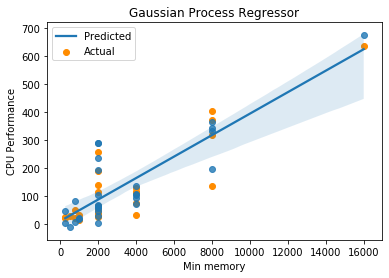

In [6]:
plot(cross_validation_x_data, cross_validation_actual_y_values, test_y, 1)

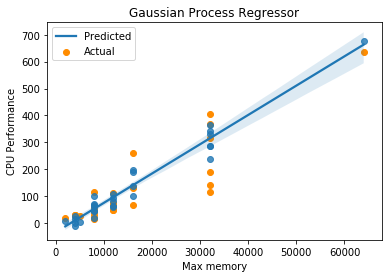

In [7]:
plot(cross_validation_x_data, cross_validation_actual_y_values, test_y, 2)

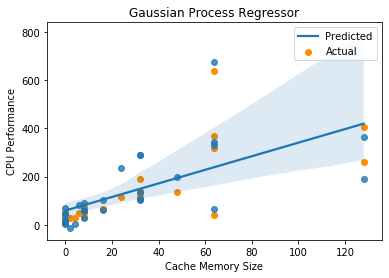

In [8]:
plot(cross_validation_x_data, cross_validation_actual_y_values, test_y, 3)

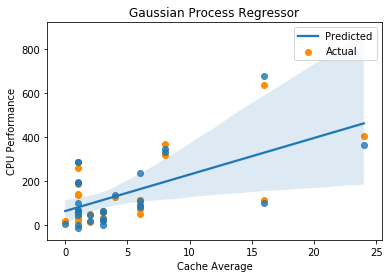

In [9]:
plot(cross_validation_x_data, cross_validation_actual_y_values, test_y, 4)